# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [10]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np #added numpy 

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
#I had to play around with the merges to get the output desired
merged_df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how= "left") 

# Display the data table for preview
merged_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Check column names in both DataFrames
print("Mouse Metadata Columns:", mouse_metadata.columns)
print("Study Results Columns:", study_results.columns)


Mouse Metadata Columns: Index(['version https://git-lfs.github.com/spec/v1'], dtype='object')
Study Results Columns: Index(['version https://git-lfs.github.com/spec/v1'], dtype='object')


In [11]:
# Checking the number of mice.
subjects = merged_df["Mouse ID"].nunique()
subjects

249

In [12]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicates = merged_df.loc[merged_df.duplicated(subset=['Mouse ID', 'Timepoint']), "Mouse ID"].unique()
duplicates

array(['g989'], dtype=object)

In [13]:
# Optional: Get all the data for the duplicate mouse ID.
dupes = merged_df[merged_df['Mouse ID'] == 'g989']
dupes

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [20]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = merged_df[merged_df['Mouse ID'] != 'g989']
cleaned_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [21]:
# Checking the number of mice in the clean DataFrame.
cleaned_df["Mouse ID"].nunique()

248

## Summary Statistics

In [22]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
mean = merged_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = merged_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = merged_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
std = merged_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = merged_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

tumor_vol_by_drug = pd.DataFrame({
    'Mean Tumor Volume': mean,
    'Median Tumor Volume': median,
    'Tumor Volume Variance': variance,
    'Tumor Volume Std. Dev.': std, 
    'Tumor Volume Std. Err.': sem
})
tumor_vol_by_drug


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [23]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
agg = merged_df.groupby('Drug Regimen').agg({"Tumor Volume (mm3)":['mean', 'median', 'var', 'std', 'sem']})
agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

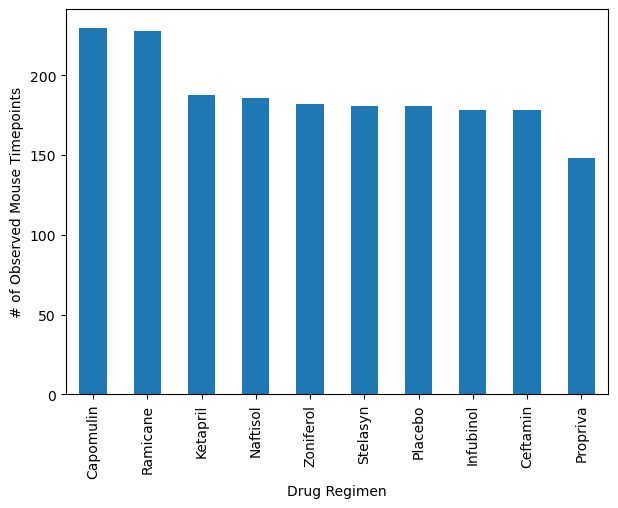

In [24]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mouse_ID_Timepoint = cleaned_df[['Drug Regimen', 'Timepoint', 'Mouse ID']]
mouse_ID_Timepoint = cleaned_df['Drug Regimen'].value_counts()
mouse_ID_Timepoint.plot(kind='bar', figsize=(7,5),
                        xlabel = 'Drug Regimen',
                        ylabel='# of Observed Mouse Timepoints')

plt.show()

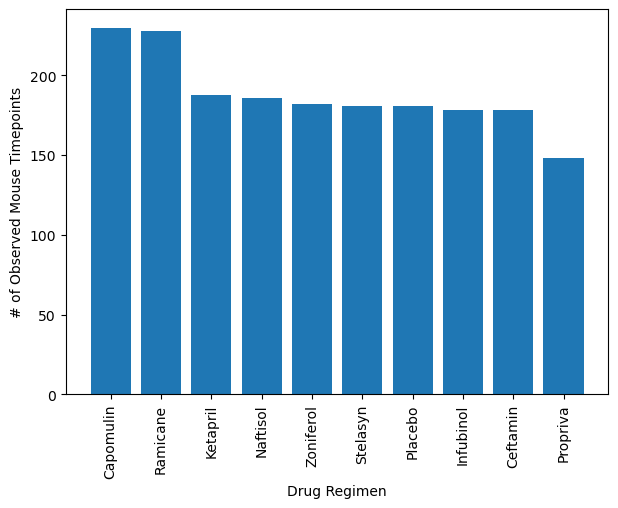

In [25]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
mouse_ID_Timepoint = cleaned_df['Drug Regimen'].value_counts()

# Create a bar plot using pyplot
plt.figure(figsize=(7,5))
plt.bar(mouse_ID_Timepoint.index, mouse_ID_Timepoint.values)

# Add labels and title
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=90)

# Display the plot
plt.show()

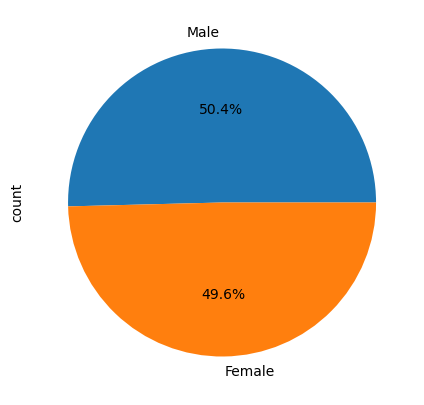

In [26]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender


# Make the pie chart
gender = cleaned_df.loc[:,['Mouse ID', 'Sex']].drop_duplicates() #Angel Milla helped me drop duplicates in this code to return the correct results, which also fixed my next pie chart as well.
piepandas = gender['Sex'].value_counts()
piepandas.plot(kind='pie', figsize=(7,5), autopct= '%1.1f%%')
plt.show()

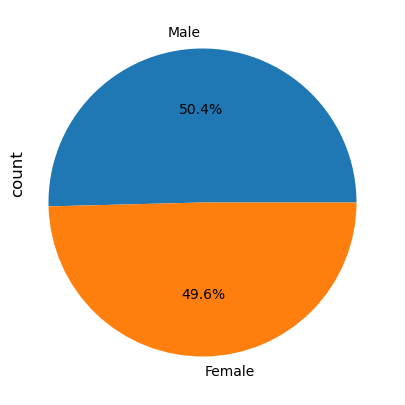

In [27]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender


# Make the pie chart
piepyplot = gender['Sex'].value_counts()
plt.figure(figsize=(7,5))
plt.pie(piepyplot.values, labels=piepyplot.index, autopct='%1.1f%%', startangle=0)
plt.title('count', loc='left', rotation=90, y=0.5)
plt.show()

## Quartiles, Outliers and Boxplots

In [28]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_timepoint_df = cleaned_df.groupby('Mouse ID').max()['Timepoint'].reset_index()
last_timepoint_data = pd.merge(last_timepoint_df, cleaned_df, on=['Mouse ID', 'Timepoint'], how='left')
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_data = last_timepoint_data[last_timepoint_data['Drug Regimen'].isin(treatment_regimens)]
final_tumor_volume = filtered_data[['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)']]
final_tumor_volume

,Mouse ID,Drug Regimen,Tumor Volume (mm3)
0,a203,Infubinol,67.973419
1,a251,Infubinol,65.525743
3,a275,Ceftamin,62.999356
6,a411,Ramicane,38.407618
7,a444,Ramicane,43.047543
...,...,...,...
238,y769,Ceftamin,68.594745
239,y793,Capomulin,31.896238
240,y865,Ceftamin,64.729837
244,z578,Ramicane,30.638696


In [30]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers.


    # Locate the rows which contain mice on each drug and get the tumor volumes


    # add subset


    # Determine outliers using upper and lower bounds
tumor_vol_data = []

for regimen in treatment_regimens: 
    regimen_data = final_tumor_volume[final_tumor_volume['Drug Regimen'] == regimen]['Tumor Volume (mm3)']
    q1 = regimen_data.quantile(0.25)
    q3 = regimen_data.quantile(0.75)
    iqr = q3 - q1 
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = regimen_data[(regimen_data < lower_bound) | (regimen_data > upper_bound)]
    tumor_vol_data.append(regimen_data)

    if outliers.empty: 
        print(f"{regimen}'s potential outliers: series([], Name: Tumor Volume (mm3), dtype: float64)")
    else:
        print(f"{regimen}'s potential outliers: {outliers}")

Capomulin's potential outliers: series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: series([], Name: Tumor Volume (mm3), dtype: float64)


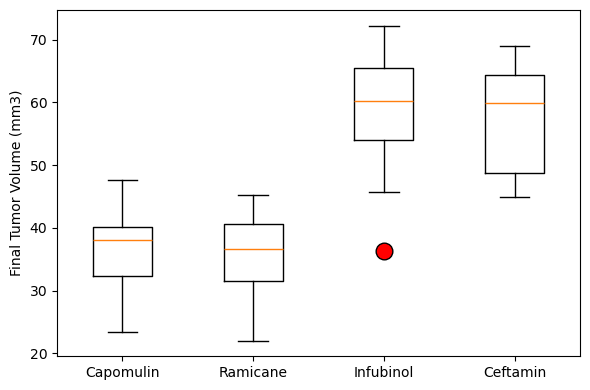

In [31]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
drug_regimen_groups = [final_tumor_volume[final_tumor_volume['Drug Regimen'] == regimen]['Tumor Volume (mm3)'] 
                       for regimen in treatment_regimens]

plt.figure(figsize = (6,4))
plt.boxplot(drug_regimen_groups, tick_labels=treatment_regimens, flierprops={'markerfacecolor':'red', 'markersize':12})

plt.ylabel("Final Tumor Volume (mm3)")

plt.tight_layout()
plt.show()

## Line and Scatter Plots

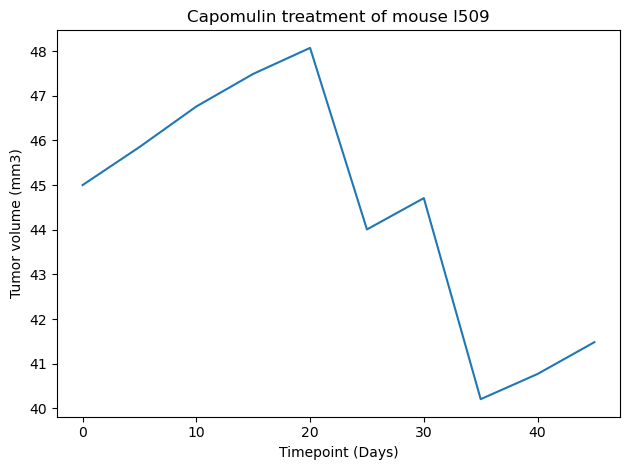

In [32]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id = 'l509'
drug_regimen = 'Capomulin'

#Filter the data frame for the specific mouse and drug regimen
mouse_capomulin_treatment = cleaned_df.loc[(cleaned_df['Mouse ID'] == mouse_id) & 
                                       (cleaned_df['Drug Regimen'] == drug_regimen)]

#plot tumor volume vs. timepoint for the selected mouse and drug regimen
# plt.figure(figsize=(6,4))
plt.plot(mouse_capomulin_treatment['Timepoint'], mouse_capomulin_treatment['Tumor Volume (mm3)'])

#set labels and title 
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor volume (mm3)")
plt.title(f"{drug_regimen} treatment of mouse {mouse_id}")

#display the plot 
plt.tight_layout()
plt.show()

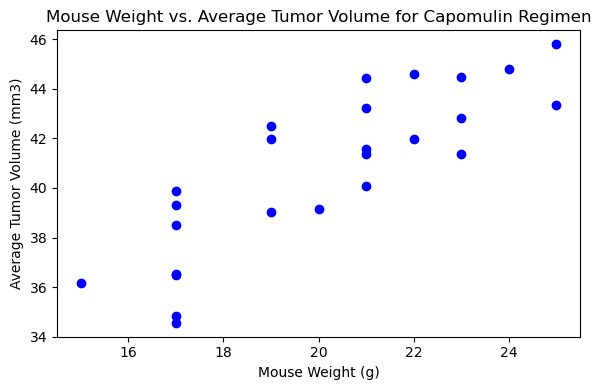

In [33]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Filter the data to only include Capomulin regimen
capomulin_data = cleaned_df[cleaned_df['Drug Regimen'] == 'Capomulin']

# Group by Mouse ID and calculate the average tumor volume for each mouse
avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()

# Merge the average tumor volume data with the mouse weight data
mouse_weight_data = cleaned_df[['Mouse ID', 'Weight (g)']].drop_duplicates()
merged_data = pd.merge(avg_tumor_volume, mouse_weight_data, on='Mouse ID')

# Generate a scatter plot of mouse weight vs. average tumor volume
plt.figure(figsize=(6,4))
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'], color='b', marker='o')

# Set labels and title
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight vs. Average Tumor Volume for Capomulin Regimen")

# Display the plot
plt.tight_layout()
plt.show()

## Correlation and Regression

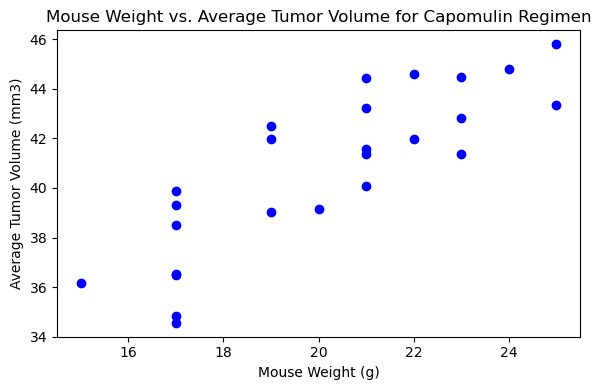

In [36]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
# Filter the data to only include Capomulin regimen
capomulin_data = cleaned_df[cleaned_df['Drug Regimen'] == 'Capomulin']

# Group by Mouse ID and calculate the average tumor volume for each mouse
avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()

# Merge the average tumor volume data with the mouse weight data
mouse_weight_data = cleaned_df[['Mouse ID', 'Weight (g)']].drop_duplicates()
merged_data = pd.merge(avg_tumor_volume, mouse_weight_data, on='Mouse ID')

# Generate a scatter plot of mouse weight vs. average tumor volume
plt.figure(figsize=(6,4))
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'], color='b', marker='o')

# Set labels and title
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight vs. Average Tumor Volume for Capomulin Regimen")

# Display the plot
plt.tight_layout()
plt.show()